<h2>Model_Building</h2>

In [2]:
import numpy as np 
import pandas as pd 

In [3]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score


In [4]:
# df2['CROP'].value_counts()

In [5]:
df=pd.read_csv('Datasets/updated_data.csv')

In [6]:
df.head()

,Unnamed: 0,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,STATE,CROP_PRICE,CROP
0,0,90,42,43,20.879744,82.002744,6.502985,202.935536,Andaman and Nicobar,7000.0,Rice
1,1,85,58,41,21.770462,80.319644,7.038096,226.655537,Andaman and Nicobar,5000.0,Rice
2,2,60,55,44,23.004459,82.320763,7.840207,263.964248,Andaman and Nicobar,7000.0,Rice
3,3,74,35,40,26.491096,80.158363,6.980401,242.864034,Andaman and Nicobar,7000.0,Rice
4,4,69,37,42,23.058049,83.370118,7.073454,251.055000,Andaman and Nicobar,3500.0,Rice


In [7]:
df1=df

In [8]:
df1=df1.sample(frac=1)
df1.head()

,Unnamed: 0,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,STATE,CROP_PRICE,CROP
1315,1315,118,18,52,28.049436,90.831307,6.562833,20.762230,Tamil Nadu,2599.0,Muskmelon
1857,1857,121,53,19,23.513087,76.726214,7.976889,80.112721,Uttar Pradesh,545.0,Cotton
614,614,21,44,18,27.069100,86.899341,7.128511,50.467461,Kerala,2000.0,MungBean
1862,1862,118,44,23,22.084583,82.829041,6.691690,67.064598,Uttar Pradesh,1760.0,Cotton
1173,1173,39,127,202,15.324665,81.672160,6.477768,71.601030,Rajasthan,3500.0,Grapes


In [9]:
df1.drop('Unnamed: 0', axis=1,inplace=True)
# df1.info()

In [10]:
df2=df1

In [11]:
y=df2['CROP']
x=df2.drop('CROP', axis=1)

In [12]:
x.head()

,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,STATE,CROP_PRICE
1315,118,18,52,28.049436,90.831307,6.562833,20.762230,Tamil Nadu,2599.0
1857,121,53,19,23.513087,76.726214,7.976889,80.112721,Uttar Pradesh,545.0
614,21,44,18,27.069100,86.899341,7.128511,50.467461,Kerala,2000.0
1862,118,44,23,22.084583,82.829041,6.691690,67.064598,Uttar Pradesh,1760.0
1173,39,127,202,15.324665,81.672160,6.477768,71.601030,Rajasthan,3500.0


In [13]:

from sklearn.preprocessing import OneHotEncoder

categorical_feature = 'STATE'

encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

encoded_data = pd.DataFrame(encoder.fit_transform(x[[categorical_feature]]))

new_column_names = encoder.get_feature_names_out([categorical_feature])

#creating new columns and appending the new encoded columns to the dataset.
for i in range(len(new_column_names)):
    x[new_column_names[i]] = encoded_data.iloc[:, i]

# Now categorical feature is one-hot encoded
print(x)


      N_SOIL  P_SOIL  K_SOIL  TEMPERATURE   HUMIDITY        ph    RAINFALL  \
1315     118      18      52    28.049436  90.831307  6.562833   20.762230   
1857     121      53      19    23.513087  76.726214  7.976889   80.112721   
614       21      44      18    27.069100  86.899341  7.128511   50.467461   
1862     118      44      23    22.084583  82.829041  6.691690   67.064598   
1173      39     127     202    15.324665  81.672160  6.477768   71.601030   
...      ...     ...     ...          ...        ...       ...         ...   
55        71      46      40    20.280194  82.123542  7.236705  191.953574   
1334     117      25      53    29.118585  92.125430  6.413927   24.520202   
1650      70      65      52    30.420121  93.126598  6.583529   75.952950   
2033     116      40      33    24.913705  54.153192  7.042089  129.548114   
859       25      27      41    19.200904  94.276596  6.923509  108.042355   

              STATE  CROP_PRICE  STATE_Andaman and Nicobar  ...

In [14]:
x.drop('STATE', axis=1, inplace=True) # Duplicate category
x.drop('CROP_PRICE', axis=1, inplace=True) #outdated data in this field

In [15]:
x.head()

,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,STATE_Andaman and Nicobar,STATE_Andhra Pradesh,STATE_Assam,...,STATE_Odisha,STATE_Pondicherry,STATE_Punjab,STATE_Rajasthan,STATE_Tamil Nadu,STATE_Telangana,STATE_Tripura,STATE_Uttar Pradesh,STATE_Uttrakhand,STATE_West Bengal
1315,118,18,52,28.049436,90.831307,6.562833,20.762230,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1857,121,53,19,23.513087,76.726214,7.976889,80.112721,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
614,21,44,18,27.069100,86.899341,7.128511,50.467461,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1862,118,44,23,22.084583,82.829041,6.691690,67.064598,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1173,39,127,202,15.324665,81.672160,6.477768,71.601030,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


splitting data into Train, Validation and test

In [16]:
tr_no=int(0.7*len(x))

train_x=x[:tr_no]

test_x=x[tr_no:]

train_y=y[:tr_no]

test_y=y[tr_no:]


In [17]:
train_x

,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,STATE_Andaman and Nicobar,STATE_Andhra Pradesh,STATE_Assam,...,STATE_Odisha,STATE_Pondicherry,STATE_Punjab,STATE_Rajasthan,STATE_Tamil Nadu,STATE_Telangana,STATE_Tripura,STATE_Uttar Pradesh,STATE_Uttrakhand,STATE_West Bengal
1315,118,18,52,28.049436,90.831307,6.562833,20.762230,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1857,121,53,19,23.513087,76.726214,7.976889,80.112721,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
614,21,44,18,27.069100,86.899341,7.128511,50.467461,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1862,118,44,23,22.084583,82.829041,6.691690,67.064598,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1173,39,127,202,15.324665,81.672160,6.477768,71.601030,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1383,80,18,52,27.873174,91.148496,6.484800,24.052079,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1700,31,6,26,29.128591,91.309248,5.741367,157.238855,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1433,9,137,200,21.121521,90.687877,5.636687,102.801720,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
937,13,17,45,21.254336,92.650589,7.159521,106.278467,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


<h3>Navie Bayes</h3>

In [18]:
model = GaussianNB()

In [19]:
model.fit(train_x, train_y)

GaussianNB()

In [20]:
test_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 660 entries, 1545 to 859
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   N_SOIL                     660 non-null    int64  
 1   P_SOIL                     660 non-null    int64  
 2   K_SOIL                     660 non-null    int64  
 3   TEMPERATURE                660 non-null    float64
 4   HUMIDITY                   660 non-null    float64
 5   ph                         660 non-null    float64
 6   RAINFALL                   660 non-null    float64
 7   STATE_Andaman and Nicobar  660 non-null    float64
 8   STATE_Andhra Pradesh       660 non-null    float64
 9   STATE_Assam                660 non-null    float64
 10  STATE_Chattisgarh          660 non-null    float64
 11  STATE_Goa                  660 non-null    float64
 12  STATE_Gujarat              660 non-null    float64
 13  STATE_Haryana              660 non-null    floa

In [21]:
testing_y=model.predict(test_x)

In [22]:
accuracy = accuracy_score(test_y, testing_y)
precision = precision_score(test_y, testing_y, average='weighted')
recall = recall_score(test_y, testing_y, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")


Accuracy: 0.8424
Precision: 0.8665
Recall: 0.8424


<h3>Random Forests</h3>

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
train_x.head()

,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,STATE_Andaman and Nicobar,STATE_Andhra Pradesh,STATE_Assam,...,STATE_Odisha,STATE_Pondicherry,STATE_Punjab,STATE_Rajasthan,STATE_Tamil Nadu,STATE_Telangana,STATE_Tripura,STATE_Uttar Pradesh,STATE_Uttrakhand,STATE_West Bengal
1315,118,18,52,28.049436,90.831307,6.562833,20.762230,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1857,121,53,19,23.513087,76.726214,7.976889,80.112721,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
614,21,44,18,27.069100,86.899341,7.128511,50.467461,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1862,118,44,23,22.084583,82.829041,6.691690,67.064598,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1173,39,127,202,15.324665,81.672160,6.477768,71.601030,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
model1=RandomForestClassifier(n_estimators=100, random_state=42)
model1.fit(train_x, train_y)
testing_y1=model1.predict(test_x)

In [26]:
accuracy = accuracy_score(test_y, testing_y1)
precision = precision_score(test_y, testing_y1, average='weighted')
recall = recall_score(test_y, testing_y1, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Accuracy: 0.9939
Precision: 0.9945
Recall: 0.9939


<h4>Dumping this model as a pickle file in the folder</h4>

In [27]:
# pip install pickle



In [28]:
import pickle as pickle

In [29]:
pickle.dump(model1, open('RNDFRST.pkl', 'wb'))

<h4>Evaluating why Random forest did significantly better than Naive bayes (99.3% >> 84%) Accuracy</h4> 
-There are a few assumptions that naive bayes makes when making predictions<br>
        &nbsp;&nbsp;&nbsp;&nbsp; ->Gausian distribution (Since we are using the gaussian classifier)<br>
        &nbsp;&nbsp;&nbsp;&nbsp; ->The parameters/Features in the dataset are independent from one another 

In [30]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2200 entries, 1315 to 859
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N_SOIL       2200 non-null   int64  
 1   P_SOIL       2200 non-null   int64  
 2   K_SOIL       2200 non-null   int64  
 3   TEMPERATURE  2200 non-null   float64
 4   HUMIDITY     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   RAINFALL     2200 non-null   float64
 7   STATE        2200 non-null   object 
 8   CROP_PRICE   2200 non-null   float64
 9   CROP         2200 non-null   object 
dtypes: float64(5), int64(3), object(2)
memory usage: 189.1+ KB


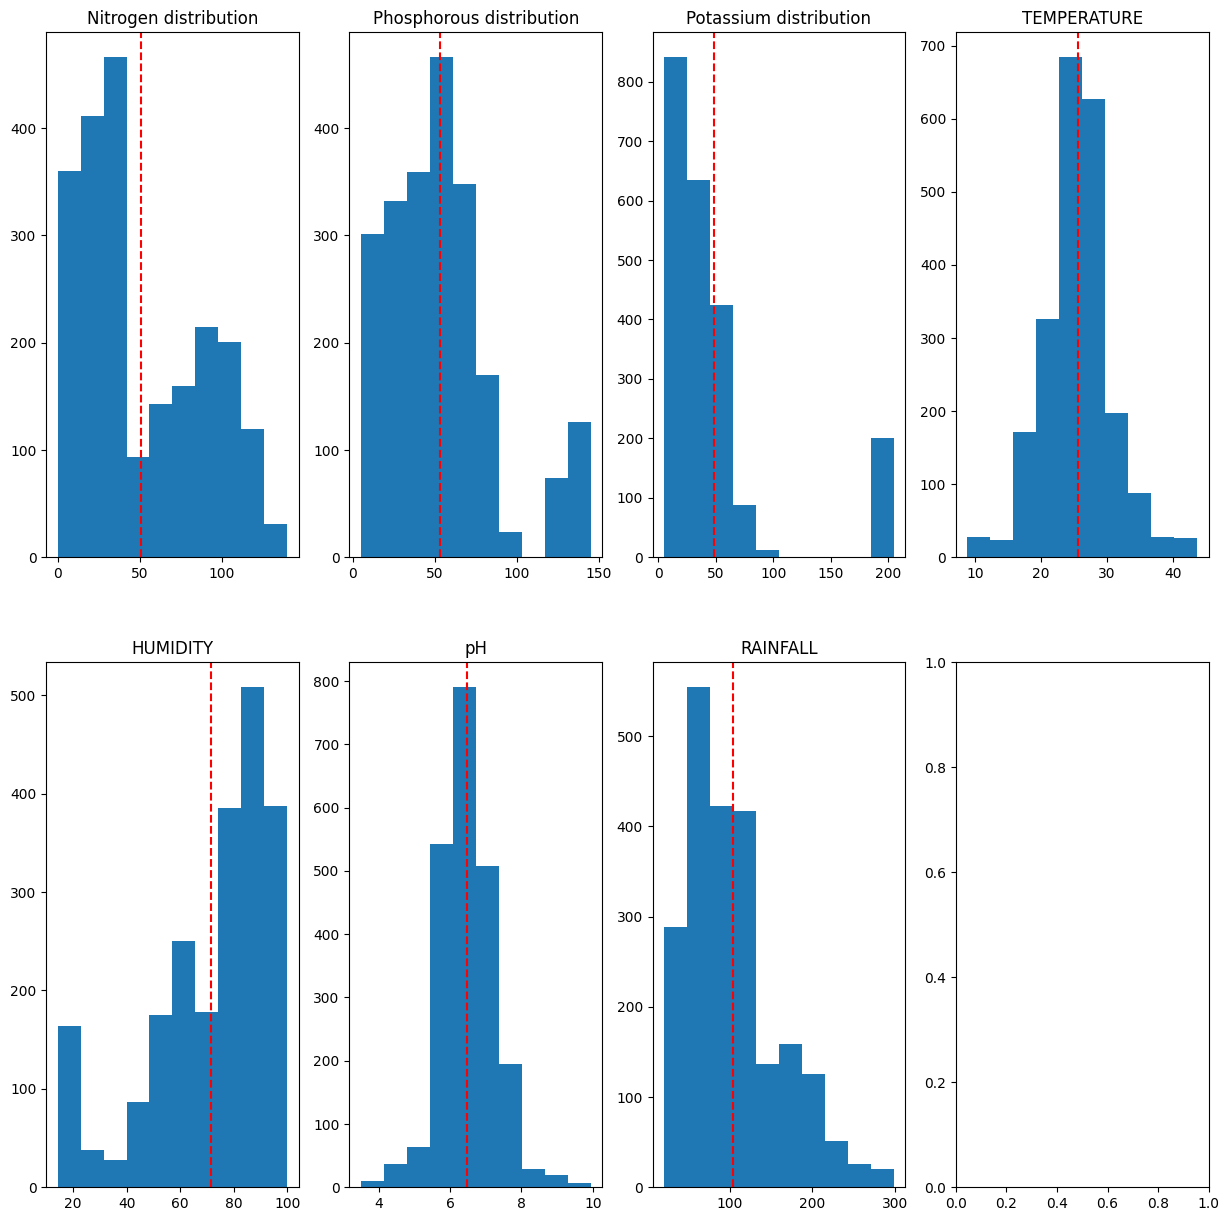

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

fig,axes= plt.subplots(2,4, figsize=(15,15))
axes[0][0].hist(df2['N_SOIL'])
axes[0][0].axvline(x=df2['N_SOIL'].mean(), color='Red', linestyle='dashed')
axes[0][0].set_title('Nitrogen distribution')

axes[0][1].hist(df2['P_SOIL'])
axes[0][1].axvline(x=df2['P_SOIL'].mean(), color='Red', linestyle='dashed')
axes[0][1].set_title('Phosphorous distribution')

axes[0][2].hist(df2['K_SOIL'])
axes[0][2].axvline(x=df2['K_SOIL'].mean(), color='Red', linestyle='dashed')
axes[0][2].set_title('Potassium distribution')

axes[0][3].hist(df2['TEMPERATURE'])
axes[0][3].axvline(x=df2['TEMPERATURE'].mean(), color='Red', linestyle='dashed')
axes[0][3].set_title('TEMPERATURE')

axes[1][0].hist(df2['HUMIDITY'])
axes[1][0].axvline(x=df2['HUMIDITY'].mean(), color='Red', linestyle='dashed')
axes[1][0].set_title('HUMIDITY')

axes[1][1].hist(df2['ph'])
axes[1][1].axvline(x=df2['ph'].mean(), color='Red', linestyle='dashed')
axes[1][1].set_title('pH')

axes[1][2].hist(df2['RAINFALL'])
axes[1][2].axvline(x=df2['RAINFALL'].mean(), color='Red', linestyle='dashed')
axes[1][2].set_title('RAINFALL')


plt.show()


<h5>Here we can see only two features follow the normal distribution</h5>
&nbsp;&nbsp;&nbsp;&nbsp;->Temperature<br>
&nbsp;&nbsp;&nbsp;&nbsp;->pH <br><br>
which may be the reason for the poorer perfomance of the naive bayes algorithm comparetively

<h3>Employing SVM classifier </h3>  #COME BACK TO THIS LATER


Retrieving the vector/matrix with high probabilities.

In [32]:
train_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1540 entries, 1315 to 1934
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   N_SOIL                     1540 non-null   int64  
 1   P_SOIL                     1540 non-null   int64  
 2   K_SOIL                     1540 non-null   int64  
 3   TEMPERATURE                1540 non-null   float64
 4   HUMIDITY                   1540 non-null   float64
 5   ph                         1540 non-null   float64
 6   RAINFALL                   1540 non-null   float64
 7   STATE_Andaman and Nicobar  1540 non-null   float64
 8   STATE_Andhra Pradesh       1540 non-null   float64
 9   STATE_Assam                1540 non-null   float64
 10  STATE_Chattisgarh          1540 non-null   float64
 11  STATE_Goa                  1540 non-null   float64
 12  STATE_Gujarat              1540 non-null   float64
 13  STATE_Haryana              1540 non-null   fl

In [33]:
# df=pd.DataFrame({
#     ''
# })

In [34]:

predicted_proba = model1.predict_proba(train_x[:1])

# for i in range(4):
#     for j in range(22):
#         if(predicted_proba[i][j]>=0.2 and predicted_proba[i][j]<0.95):
#             print(f"{i}: {predicted_proba[i]}")
#             print("\n")
#             break

predicted_proba


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 0.]])

In [35]:
labels=model1.classes_
labels

array(['Apple', 'Banana', 'Blackgram', 'ChickPea', 'Coconut', 'Coffee',
       'Cotton', 'Grapes', 'Jute', 'KidneyBeans', 'Lentil', 'Maize',
       'Mango', 'MothBeans', 'MungBean', 'Muskmelon', 'Orange', 'Papaya',
       'PigeonPeas', 'Pomegranate', 'Rice', 'Watermelon'], dtype=object)

In [36]:
train_x

,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,STATE_Andaman and Nicobar,STATE_Andhra Pradesh,STATE_Assam,...,STATE_Odisha,STATE_Pondicherry,STATE_Punjab,STATE_Rajasthan,STATE_Tamil Nadu,STATE_Telangana,STATE_Tripura,STATE_Uttar Pradesh,STATE_Uttrakhand,STATE_West Bengal
1315,118,18,52,28.049436,90.831307,6.562833,20.762230,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1857,121,53,19,23.513087,76.726214,7.976889,80.112721,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
614,21,44,18,27.069100,86.899341,7.128511,50.467461,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1862,118,44,23,22.084583,82.829041,6.691690,67.064598,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1173,39,127,202,15.324665,81.672160,6.477768,71.601030,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1383,80,18,52,27.873174,91.148496,6.484800,24.052079,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1700,31,6,26,29.128591,91.309248,5.741367,157.238855,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1433,9,137,200,21.121521,90.687877,5.636687,102.801720,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
937,13,17,45,21.254336,92.650589,7.159521,106.278467,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


<h2>Encoding the user inputs</h2>

In [37]:

n=50
p=75
k=50
t=45
h=100
ph=10
r=170
s="Andhra Pradesh"
columns=train_x.columns.to_list()
columns=columns[7:]
dataf={'N_SOIL':n,
    'P_SOIL':p,
    'K_SOIL':k,
    'TEMPERATURE':t,
    'HUMIDITY':h,
    'ph':ph,
    'RAINFALL': r}
dataf=pd.DataFrame(dataf, index=['new_data'])

for c in columns:
    if(c==f"STATE_{s}"):
        dataf[c]=1.0
    else:
        dataf[c]=0.0

dataf
    



,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,STATE_Andaman and Nicobar,STATE_Andhra Pradesh,STATE_Assam,...,STATE_Odisha,STATE_Pondicherry,STATE_Punjab,STATE_Rajasthan,STATE_Tamil Nadu,STATE_Telangana,STATE_Tripura,STATE_Uttar Pradesh,STATE_Uttrakhand,STATE_West Bengal
new_data,50,75,50,45,100,10,170,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
resp=model1.predict(dataf)


<h1>Implementing Explainability</h1>
<h3>->PDP (partial dependence plots)</h3>
<h3>->SHAP (Shapley additive explainations)<h3>

In [39]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


<h4> Below code provides all possible crops for soil</h4> 

In [42]:
prob=model1.predict_proba(dataf)
probab=prob[0]
indices=probab.argsort()[::-1][:2] #to find the index of 2 largest probabilites in prediction

crop1= model1.classes_[indices[0]]

if (probab[indices[0]]-probab[indices[1]])<0.2:
    crop2=model1.classes_[indices[1]]
    print(f"The crops that are most suitable for your soil are {crop1} and {crop2}")

# probab[indices[0]]



0.68

In [43]:
model1.classes_

array(['Apple', 'Banana', 'Blackgram', 'ChickPea', 'Coconut', 'Coffee',
       'Cotton', 'Grapes', 'Jute', 'KidneyBeans', 'Lentil', 'Maize',
       'Mango', 'MothBeans', 'MungBean', 'Muskmelon', 'Orange', 'Papaya',
       'PigeonPeas', 'Pomegranate', 'Rice', 'Watermelon'], dtype=object)

Displaying the explainability

c:\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


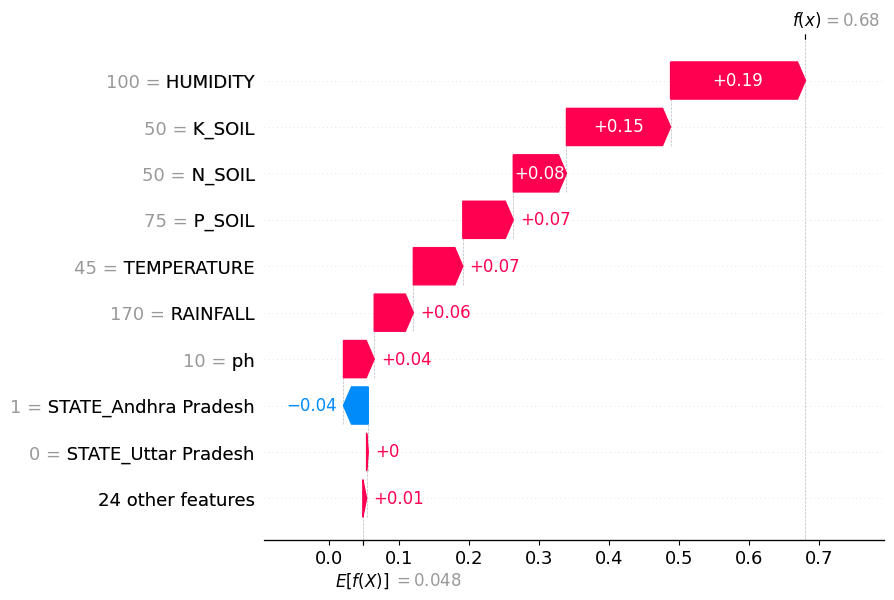

IndexError: index 1 is out of bounds for axis 0 with size 1

In [41]:
import matplotlib.pyplot as plt

import shap
shap.initjs()


explainer=shap.Explainer(model1)

shap_values=explainer(dataf)

shap.plots.waterfall(shap_values[0,:,indices[0]])

shap.plots.waterfall(shap_values[0,:,indices[1]])





In [ ]:
shap_values[0,:,indices[0]]


.values =
array([ 1.00269487e-01,  8.71671418e-02,  1.77277384e-01,  9.06858175e-02,
        1.84903678e-01,  8.26640620e-02,  5.99536284e-02,  4.56591432e-04,
       -1.28347068e-02,  6.58454581e-04,  4.03864110e-05,  1.58051071e-05,
        3.13769772e-04,  2.28830488e-04,  1.42687496e-03,  9.82319668e-06,
        4.00723799e-04, -3.25392768e-04,  6.71653809e-04, -6.56432614e-05,
        6.50307254e-04,  8.19530136e-05,  1.04932659e-04,  5.81852238e-04,
        8.72234600e-05,  5.82269762e-04,  2.22082478e-04,  8.53661972e-04,
        1.52818346e-04,  4.96829298e-04,  7.31267233e-04,  3.68140386e-04,
        2.47998044e-03])

.base_values =
0.048688311688311704

.data =
array([ 50.,  75.,  50.,  45., 100.,  10., 170.,   0.,   1.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.])

<H3>Partial dependency plot</h3>

In [ ]:
from sklearn.inspection import plot_partial_dependence


c:\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead
  warnings.warn(msg, category=FutureWarning)
c:\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead
  warnings.warn(msg, category=FutureWarning)


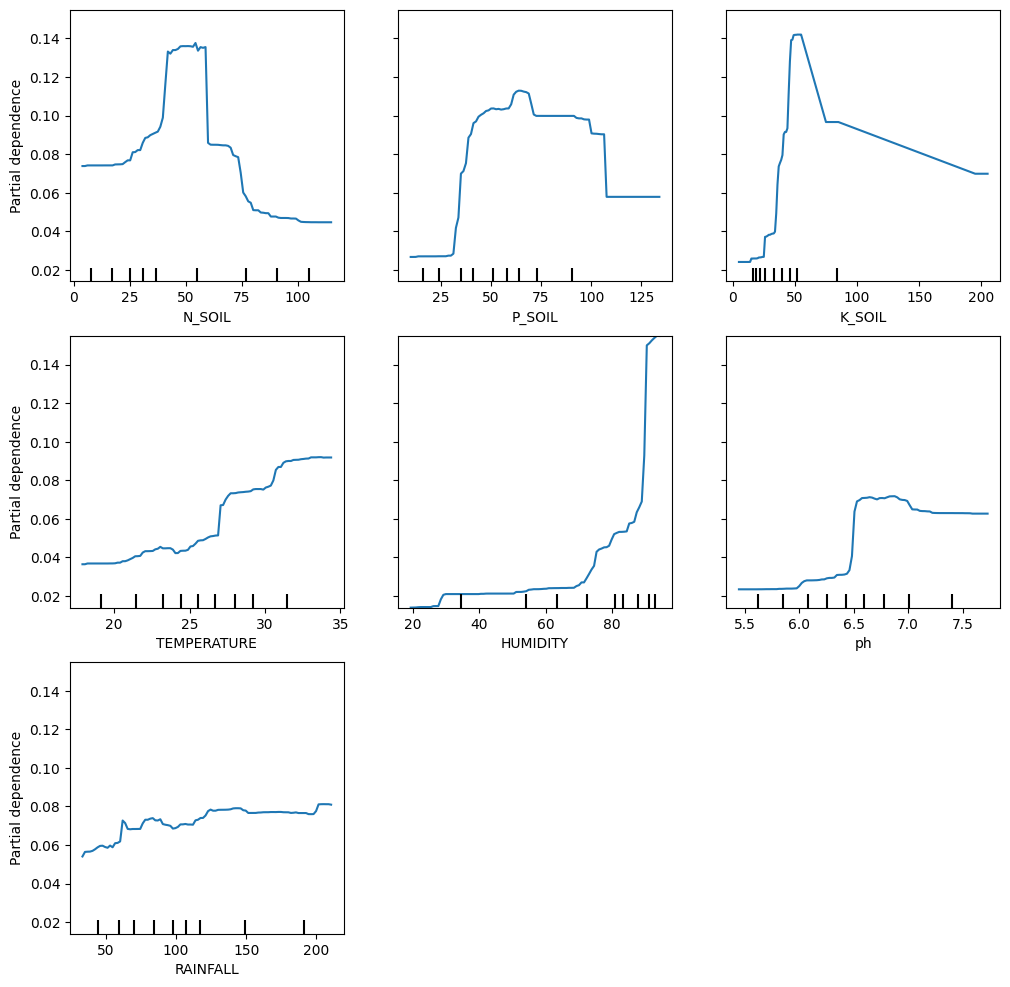

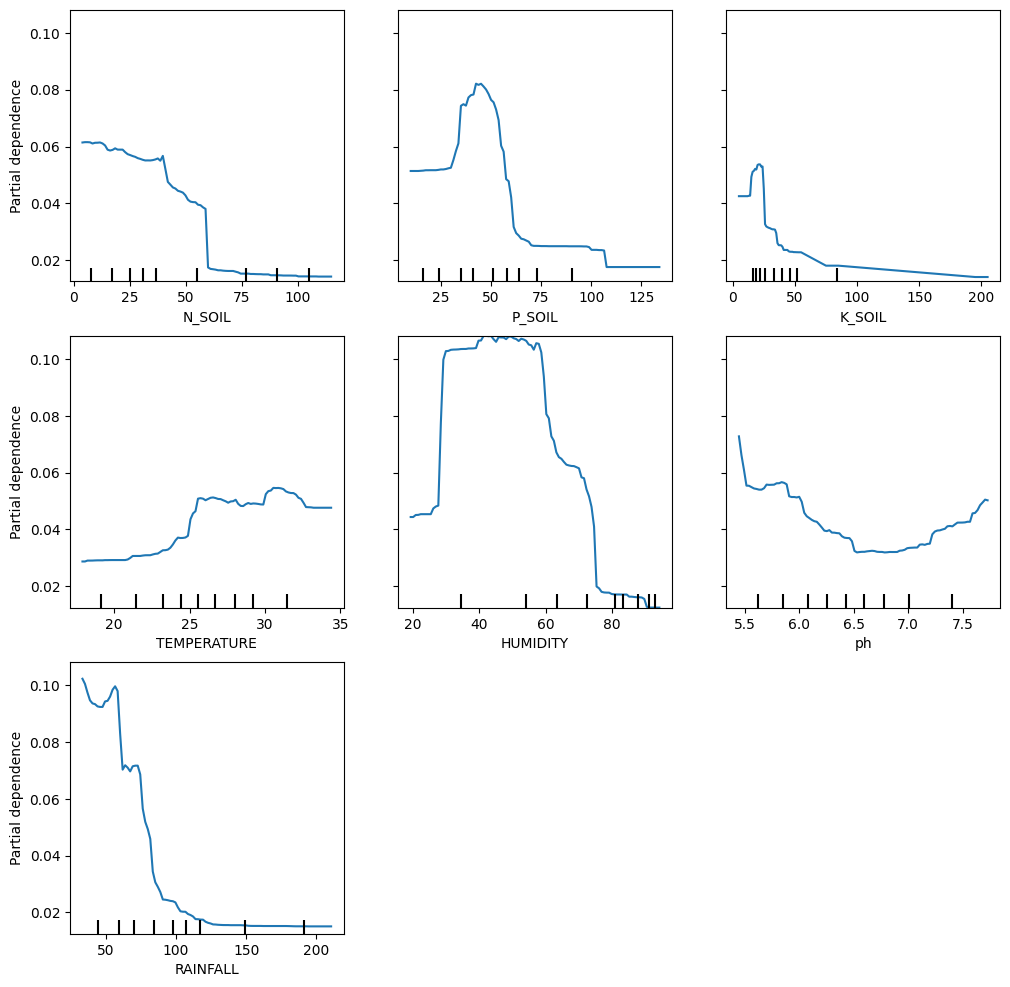

In [ ]:
fig, ax = plt.subplots(figsize=(12, 12))
plot_partial_dependence(model1 ,train_x ,dataf.columns.to_list()[:7],target=model1.classes_[indices[0]], ax=ax)
fig, ax = plt.subplots(figsize=(12, 12))
plot_partial_dependence(model1 ,train_x ,dataf.columns.to_list()[:7],target=model1.classes_[indices[1]], ax=ax)
plt.show()

<h4>The above plot shows how changes in soil affects the growth of the recommended crop</h4>

In [ ]:
model1.classes_[indices[0]] 


'Papaya'